In [91]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift

# from scipy.fft import fft, ifft, fftshift
from scipy.signal.windows import hann, flattop

In [92]:
# a)
f1 = 600  # Hz
f2 = 600.25  # Hz
f3 = 599.75  # Hz

fs = 500  # Hz
N = 2000
k = np.arange(N)

x1 = np.sin(2 * np.pi * f1 / fs * k)
x2 = np.sin(2 * np.pi * f2 / fs * k)
x3 = np.sin(2 * np.pi * f3 / fs * k)

# Normalizacja do |x[k]|max = 2
x1 *= 2 / np.max(np.abs(x1))
x2 *= 2 / np.max(np.abs(x2))
x3 *= 2 / np.max(np.abs(x3))

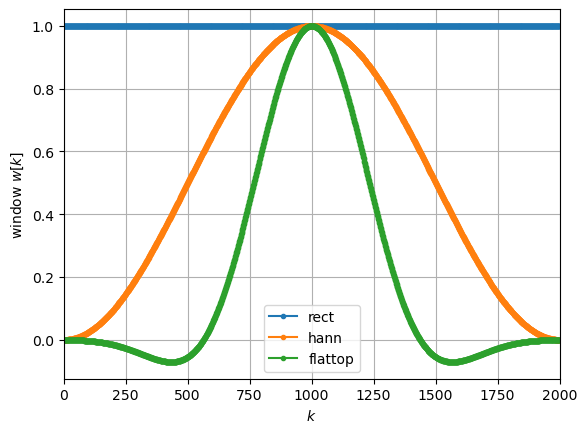

In [93]:
# b)
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)
plt.plot(wrect, "C0o-", ms=3, label="rect")
plt.plot(whann, "C1o-", ms=3, label="hann")
plt.plot(wflattop, "C2o-", ms=3, label="flattop")
plt.xlabel(r"$k$")
plt.ylabel(r"window $w[k]$")
plt.xlim(0, N)
plt.legend()
plt.grid(True)

In [94]:
# c)
X1wrect = fft(x1)
X2wrect = fft(x2)
X3wrect = fft(x3)

X1whann = fft(x1 * whann)
X2whann = fft(x2 * whann)
X3whann = fft(x3 * whann)

X1wflattop = fft(x1 * wflattop)
X2wflattop = fft(x2 * wflattop)
X3wflattop = fft(x3 * wflattop)

In [95]:
# this handling is working for N even and odd:
def fft2db(X):
    N = X.size
    Xtmp = 2 / N * X  # independent of N, norm for sine amplitudes
    Xtmp[0] *= 1 / 2  # bin for f=0 Hz is existing only once, so cancel *2 from above
    if N % 2 == 0:  # fs/2 is included as a bin
        # fs/2 bin is existing only once, so cancel *2 from above
        Xtmp[N // 2] = Xtmp[N // 2] / 2
    return 20 * np.log10(np.abs(Xtmp))  # in dB


# setup of frequency vector this way is independent of N even/odd:
df = fs / N
f = np.arange(N) * df

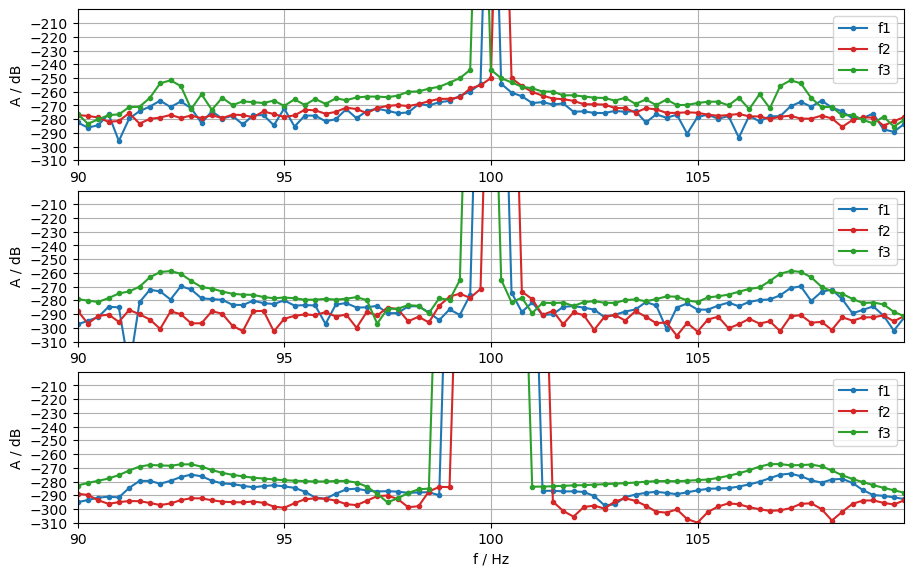

In [96]:
# Wykresy
plt.figure(figsize=(16 / 1.5, 10 / 1.5))

# Okno prostokątne
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1wrect), "C0o-", ms=3, label="f1")  
plt.plot(f, fft2db(X2wrect), "C3o-", ms=3, label="f2")
plt.plot(f, fft2db(X3wrect), "C2o-", ms=3, label="f3")  # Dodano wykres dla f3
plt.xlim(90, 110)  # Zakres wokół f1, f2, f3
plt.ylim(-310, -200)
plt.xticks(np.arange(90, 110, 5))
plt.yticks(np.arange(-310, -200, 10))
plt.legend()
plt.ylabel("A / dB")
plt.grid(True)

# Okno Hanninga
plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X1whann), "C0o-", ms=3, label="f1")
plt.plot(f, fft2db(X2whann), "C3o-", ms=3, label="f2")
plt.plot(f, fft2db(X3whann), "C2o-", ms=3, label="f3")  # Dodano wykres dla f3
plt.xlim(90, 110)  # Zakres wokół f1, f2, f3
plt.ylim(-310, -200)
plt.xticks(np.arange(90, 110, 5))
plt.yticks(np.arange(-310, -200, 10))
plt.legend()
plt.ylabel("A / dB")
plt.grid(True)

# Okno Flat-Top
plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1wflattop), "C0o-", ms=3, label="f1")
plt.plot(f, fft2db(X2wflattop), "C3o-", ms=3, label="f2")
plt.plot(f, fft2db(X3wflattop), "C2o-", ms=3, label="f3")  # Dodano wykres dla f3
plt.xlim(90, 110)  # Zakres wokół f1, f2, f3
plt.ylim(-310, -200)
plt.xticks(np.arange(90, 110, 5))
plt.yticks(np.arange(-310, -200, 10))
plt.legend()
plt.xlabel("f / Hz")
plt.ylabel("A / dB")
plt.grid(True)

plt.show()

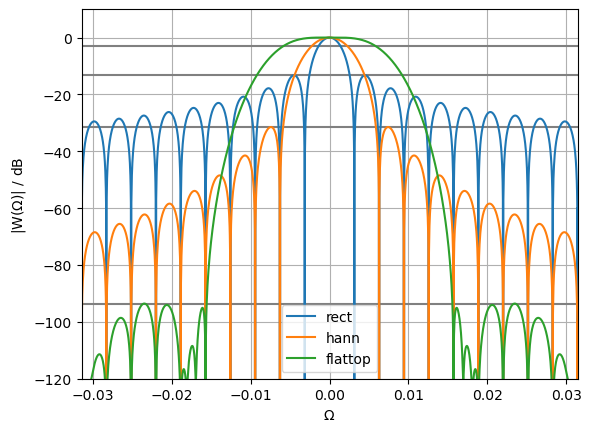

In [97]:
plt.plot([-np.pi, +np.pi], [-3.01, -3.01], "gray")  # mainlobe bandwidth
plt.plot([-np.pi, +np.pi], [-13.3, -13.3], "gray")  # rect max sidelobe
plt.plot([-np.pi, +np.pi], [-31.5, -31.5], "gray")  # hann max sidelobe
plt.plot([-np.pi, +np.pi], [-93.6, -93.6], "gray")  # flattop max sidelobe
Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label="rect")
Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label="hann")
Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label="flattop")
plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)

plt.xlim(-np.pi / 100, np.pi / 100)  # zoom into mainlobe

plt.xlabel(r"$\Omega$")
plt.ylabel(r"|W($\Omega$)| / dB")
plt.legend()
plt.grid(True)